#lab one
By:**Roshreeka Shrestha**
Roll no:**ACE079BCT049**

# Logistic Regression for Heart Disease Prediction

Dataset Source: https://www.kaggle.com/datasets/neurocipher/heartdisease

This notebook implements the full Machine Learning pipeline using Logistic Regression for binary classification.

 


## Background: AI, ML, DL, and Data Science

Artificial Intelligence (AI) focuses on building systems that can mimic human intelligence, such as reasoning, learning, and decision-making. Machine Learning (ML) is a subset of AI that enables systems to learn patterns from data and improve their performance without being explicitly programmed. Deep Learning (DL) is a specialized branch of ML that uses deep neural networks to model complex patterns, especially in areas like image recognition and natural language processing. Data Science combines statistics, machine learning, and data analysis techniques to extract meaningful insights and support data-driven decisions. One common ML technique is Logistic Regression, which is used for classification problems by predicting outcomes with two possible classes, such as yes/no or true/false

### Using the dataset Heart_Disease_Prediction.cvs
* Target variable:  **Heart Disease**
* Outcome(In Binary):
   * [1]: Presence of heart disease 
   * [0]: No heart disease                    
          

In [ ]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

<small>
# Dependencies Explanation

- **pandas (`pd`)** - For handling and analyzing data tables.  
- **numpy (`np`)** - For numerical operations and arrays.  
- **matplotlib.pyplot (`plt`)** - For plotting graphs and visualizations.  
- **train_test_split** - Split data into training and testing sets.  
- **StandardScaler** - Scale numerical features.  
- **OneHotEncoder** - Convert categorical features to numbers.  
- **ColumnTransformer** - Apply different preprocessing to different columns.  
- **Pipeline** - Chain preprocessing and model steps together.  
- **LogisticRegression** - Classification model.  
- **Metrics** - Evaluate model performance (accuracy, precision, recall, f1, confusion_matrix, classification_report).  
</small>



## Data Retrieval and Collection

In [28]:
df = pd.read_csv('Heart_Disease_Prediction.csv')
# Display dataset shape and column names
print("Dataset shape:", df.shape)
print("Columns:", df.columns)

# Show first 5 rows
df.head()


Dataset shape: (270, 14)
,Columns: Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
,       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
,       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
,      dtype='object')


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence



<small>
# Load and Inspect Dataset

- Load `Heart_Disease_Prediction.csv` into DataFrame `df`.  
- Print dataset shape (`rows, columns`).  
- Print column names to see features.  
- Show first 5 rows with `df.head()` for a quick preview.
</small>


##  Data Cleaning

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Remove invalid cholesterol values
df = df[df['Cholesterol'] > 0]
# Fill missing cholesterol values with median (if any)
if df['Cholesterol'].isnull().sum() > 0:
    df['Cholesterol'] = df['Cholesterol'].fillna(df['Cholesterol'].median())

df['Heart Disease'].unique()
print(df['Heart Disease'].value_counts())
#verify data type 
print(df.dtypes)      



Age                        0
,Sex                        0
,Chest pain type            0
,BP                         0
,Cholesterol                0
,FBS over 120               0
,EKG results                0
,Max HR                     0
,Exercise angina            0
,ST depression              0
,Slope of ST                0
,Number of vessels fluro    0
,Thallium                   0
,Heart Disease              0
,dtype: int64
,Heart Disease
,Absence     150
,Presence    120
,Name: count, dtype: int64
,Age                          int64
,Sex                          int64
,Chest pain type              int64
,BP                           int64
,Cholesterol                  int64
,FBS over 120                 int64
,EKG results                  int64
,Max HR                       int64
,Exercise angina              int64
,ST depression              float64
,Slope of ST                  int64
,Number of vessels fluro      int64
,Thallium                     int64
,Heart Disease         

<small>
# Data Cleaning and Validation

- Check for missing values in each column using `isnull().sum()`.  
- Remove rows where `Cholesterol` has invalid values (less than or equal to 0).  
- If any cholesterol values are missing, fill them with the median value.  
- Check unique values in the `Heart Disease` column to understand class labels.  
- Count the number of samples in each heart disease category.  
- Verify the data types of all columns to ensure correctness.
</small>


## Task 1: Single Feature Logistic Regression (Cholesterol)

In [15]:
X1 = df[['Cholesterol']]
y = df['Heart Disease']

X1_train, X1_test, y_train, y_test = train_test_split(
    X1, y, test_size=0.2, random_state=42
)

model1 = LogisticRegression()
model1.fit(X1_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

<small>
# Feature Selection and Model Training

- Select `Cholesterol` as the input feature (`X1`).  
- Select `Heart Disease` as the target variable (`y`).  
- Split the data into training (80%) and testing (20%) sets.  
- Create a Logistic Regression model.  
- Train the model using the training data.
</small>


In [16]:
y1_pred = model1.predict(X1_test)
print('Accuracy:', accuracy_score(y_test, y1_pred))
print('Precision:', precision_score(y_test, y1_pred))
print('Recall:', recall_score(y_test, y1_pred))
print('F1 Score:', f1_score(y_test, y1_pred))

print('\nConfusion Matrix:\n', confusion_matrix(y_test, y1_pred))
print('\nClassification Report:\n', classification_report(y_test, y1_pred))

Accuracy: 0.6111111111111112
,Precision: 0.5
,Recall: 0.23809523809523808
,F1 Score: 0.3225806451612903
,
,Confusion Matrix:
, [[28  5]
, [16  5]]
,
,Classification Report:
,               precision    recall  f1-score   support
,
,           0       0.64      0.85      0.73        33
,           1       0.50      0.24      0.32        21
,
,    accuracy                           0.61        54
,   macro avg       0.57      0.54      0.52        54
,weighted avg       0.58      0.61      0.57        54
,


<small>
# Model Evaluation

- Use the trained model to predict heart disease on the test data.  
- Calculate **Accuracy** to measure overall correctness of predictions.  
- Calculate **Precision** to see how many predicted positive cases are correct.  
- Calculate **Recall** to measure how well the model identifies actual positive cases.  
- Calculate **F1 Score** to balance precision and recall.  
- Display the **Confusion Matrix** to show correct and incorrect predictions.
</small>


### Sigmoid Curve

c:\Users\pranab\Desktop\ailab1\myenv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
,  warnings.warn(


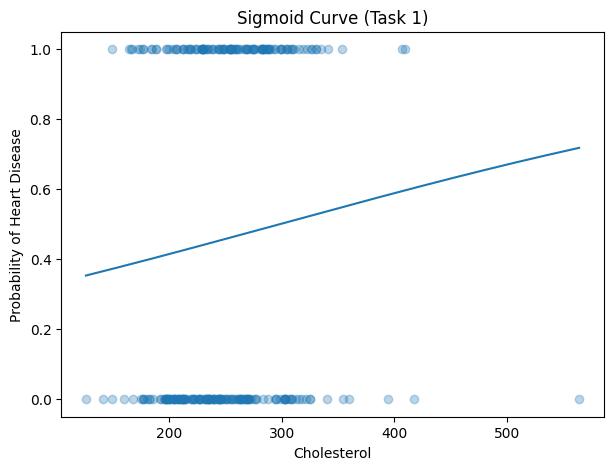

In [18]:
X_range = np.linspace(df['Cholesterol'].min(), df['Cholesterol'].max(), 300).reshape(-1,1)
probs = model1.predict_proba(X_range)[:,1]

plt.figure(figsize=(7,5))
plt.scatter(df['Cholesterol'], df['Heart Disease'], alpha=0.3)
plt.plot(X_range, probs)
plt.xlabel('Cholesterol')
plt.ylabel('Probability of Heart Disease')
plt.title('Sigmoid Curve (Task 1)')
plt.show()

##  Task 2: Multi-Feature Logistic Regression

In [24]:
X2 = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

cat_cols = ['Sex', 'Chest pain type', 'EKG results', 'Exercise angina', 'Slope of ST']
num_cols = [c for c in X2.columns if c not in cat_cols]

preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ]
)

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y, test_size=0.2, random_state=42
)

model2 = Pipeline(steps=[
    ('preprocess', preprocess),
    ('classifier', LogisticRegression(max_iter=1000))
])

model2.fit(X2_train, y2_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers

<small>
# Multiple Feature Model with Preprocessing

- Select all features except `Heart Disease` as input data (`X2`).  
- Set `Heart Disease` as the target variable (`y`).  
- Identify categorical and numerical columns.  
- Scale numerical features and one-hot encode categorical features.  
- Split the dataset into training (80%) and testing (20%) sets.  
- Build a pipeline with preprocessing and Logistic Regression model.  
- Train the model using the training data.
</small>


In [25]:
y2_pred = model2.predict(X2_test)

print('Accuracy:', accuracy_score(y2_test, y2_pred))
print('Precision:', precision_score(y2_test, y2_pred))
print('Recall:', recall_score(y2_test, y2_pred))
print('F1 Score:', f1_score(y2_test, y2_pred))

print('\nConfusion Matrix:\n', confusion_matrix(y2_test, y2_pred))
print('\nClassification Report:\n', classification_report(y2_test, y2_pred))

Accuracy: 0.8518518518518519
,Precision: 0.9333333333333333
,Recall: 0.6666666666666666
,F1 Score: 0.7777777777777778
,
,Confusion Matrix:
, [[32  1]
, [ 7 14]]
,
,Classification Report:
,               precision    recall  f1-score   support
,
,           0       0.82      0.97      0.89        33
,           1       0.93      0.67      0.78        21
,
,    accuracy                           0.85        54
,   macro avg       0.88      0.82      0.83        54
,weighted avg       0.86      0.85      0.85        54
,


<small>
# Evaluation of Multi-Feature Logistic Regression Model

- Predict heart disease outcomes using the test dataset.  
- Calculate **Accuracy** to measure overall model performance.  
- Calculate **Precision** to evaluate correctness of positive predictions.  
- Calculate **Recall** to measure how well the model detects heart disease cases.  
- Calculate **F1 Score** to balance precision and recall.  
- Display the **Confusion Matrix** to show correct and incorrect predictions.  
- Show the **Classification Report** with detailed performance metrics.
</small>


# Questions

- **Which model performs better and why?**  
  **Answer:** Between the two models, the multi-feature logistic regression performs better. This is because it incorporates several relevant predictors simultaneously, allowing the model to capture the combined effect of multiple risk factors associated with heart disease. In contrast, the single-feature model relies only on cholesterol, which limits its predictive capability and overlooks other important variables. As a result, the multi-feature model achieves higher accuracy and overall better predictive performance.


- **How does adding more feature affect accuracy and recll?**  
  **Answer**: Adding more features allows the model to capture more information and underlying patterns in the data. This generally improves both accuracy and recall, as the model can make better predictions and identify positive cases more effectively. However, it’s important to ensure the features are relevant; irrelevant or redundant features can sometimes reduce performance.

- **Trade-offs between interpretability and performance**  
  **Answer:**
      
  -**Single-feature model**: Very easy to interpret and explain, but its predictive performance is limited.
  
  -**Multi-feature model**: More complex and harder to interpret, but it captures more patterns in the data, leading to better overall performance.


**Discussion and Conclusion**  

The results of this study highlight the trade-off between model simplicity and predictive strength. Models built with a single predictor, such as
cholesterol in Task 1, were easy to understand and interpret, particularly through visual tools likethe sigmoid curve produced by logistic regression. However, relying on only one variable limitedthe model’s ability to accurately identify heart disease cases, leading to lower accuracy and recall. In Task 2, the inclusion of all relevant features—including clinical measurements and testoutcomes—allowed the logistic regression model to capture more detailed patterns in the data.This broader feature set resulted in noticeable improvements in performance metrics such asaccuracy, precision, recall, and F1-score. While multi-feature models can be more difficult tointerpret, they generally offer stronger predictive capability. Overall, logistic regression provedto be an effective approach for binary classification, and the findings suggest that using multipleinformative variables is more suitable for practical healthcare decision-making, even if it comes at the cost of reduced interpretability.
